# Bem vindo a nossa primeira avaliação!!

## Informações sobre o Dataset

   Input variables (based on physicochemical tests):\
   1 - fixed acidity\
   2 - volatile acidity\
   3 - citric acid\
   4 - residual sugar\
   5 - chlorides\
   6 - free sulfur dioxide\
   7 - total sulfur dioxide\
   8 - density\
   9 - pH\
   10 - sulphates\
   11 - alcohol
   
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

# Imports

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Criação dos DFs a partir das planilhas CSV

In [169]:
df_red = pd.read_csv('C:/GitHub_python/DS_Unesp/P1/dataset/winequality-red.csv', sep=';')
df_white = pd.read_csv('C:/GitHub_python/DS_Unesp/P1/dataset/winequality-white.csv', sep=';')

## Identificação na planilha de valores nulos e duplicados

In [170]:
# Verificar se há valores nulos
red_wine_nulls = df_red.isnull().sum()
white_wine_nulls = df_white.isnull().sum()

# Verificar se há duplicatas
red_wine_duplicates = df_red.duplicated().sum()
white_wine_duplicates = df_white.duplicated().sum()

# Resultados da verificação
print("Vinho Vermelho - Valores nulos por coluna:", red_wine_nulls.sum())
print("Vinho Vermelho - Número de duplicatas:", red_wine_duplicates)
print("Vinho Branco - Valores nulos por coluna:", white_wine_nulls.sum())
print("Vinho Branco - Número de duplicatas:", white_wine_duplicates)

Vinho Vermelho - Valores nulos por coluna: 0
Vinho Vermelho - Número de duplicatas: 240
Vinho Branco - Valores nulos por coluna: 0
Vinho Branco - Número de duplicatas: 937


## Remoção dos valores duplicados

In [171]:
# Remover duplicatas
df_red_cleaned = df_red.drop_duplicates()
df_white_cleaned = df_white.drop_duplicates()

# Verificar se foram removidas
red_wine_cleaned_duplicates = df_red_cleaned.duplicated().sum()
white_wine_cleaned_duplicates = df_white_cleaned.duplicated().sum()

print("Vinho Vermelho - Duplicatas após limpeza:", red_wine_cleaned_duplicates)
print("Vinho Branco - Duplicatas após limpeza:", white_wine_cleaned_duplicates)

Vinho Vermelho - Duplicatas após limpeza: 0
Vinho Branco - Duplicatas após limpeza: 0


## Análise exploratória dos dados através do .describe

In [172]:
# Gerar estatísticas descritivas para os datasets
red_wine_stats = df_red_cleaned.describe()
white_wine_stats = df_white_cleaned.describe()

# Exibir os describes
print("Estatísticas Descritivas do Vinho Vermelho:\n", red_wine_stats)
print("Estatísticas Descritivas do Vinho Branco:\n", white_wine_stats)

Estatísticas Descritivas do Vinho Vermelho:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min

## Visualização da distribuição de cada vinho em cada nivel de qualidade

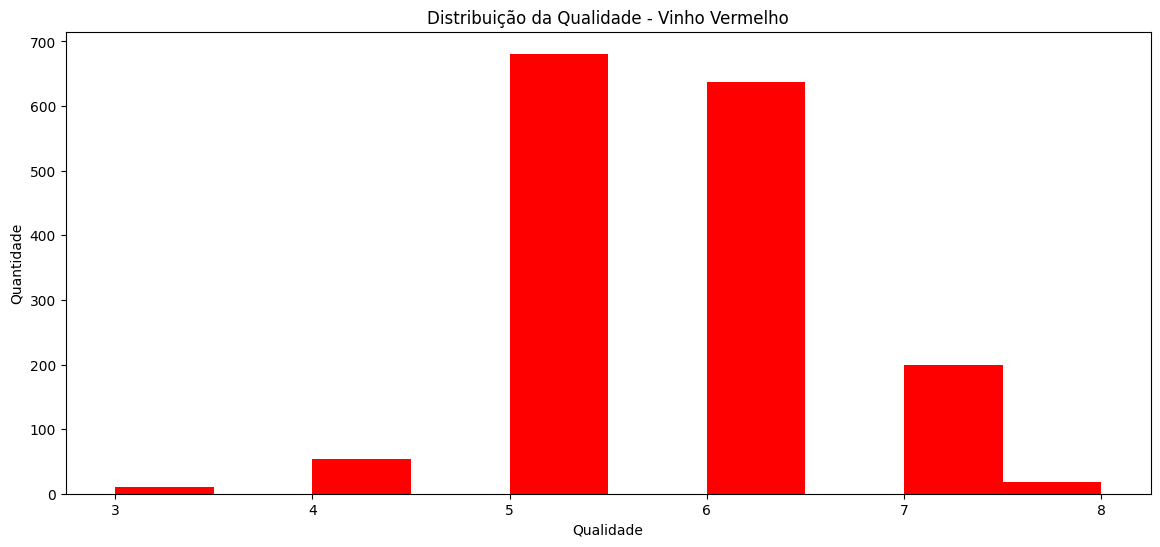

A categoria com mais unidades é a qualidade 5, com 681 unidades
A participação de cada uma das categorias em porcentagem, no lote é :quality
5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: proportion, dtype: float64


In [173]:
# Histograma para vinho Vermelho
plt.figure(figsize=(14, 6))
plt.hist(df_red['quality'], color='red')
plt.title('Distribuição da Qualidade - Vinho Vermelho')
plt.xlabel('Qualidade')
plt.ylabel('Quantidade')

plt.show()


# Calcular a porcentagem de cada nível de qualidade
quality_counts = df_red['quality'].value_counts(normalize=True) * 100

# Identificar a qualidade com maior quantidade
max_quality = df_red['quality'].value_counts().idxmax()
max_count = df_red['quality'].value_counts().max()

print(f'A categoria com mais unidades é a qualidade {max_quality}, com {max_count} unidades')
print(f'A participação de cada uma das categorias em porcentagem, no lote é :{quality_counts}')

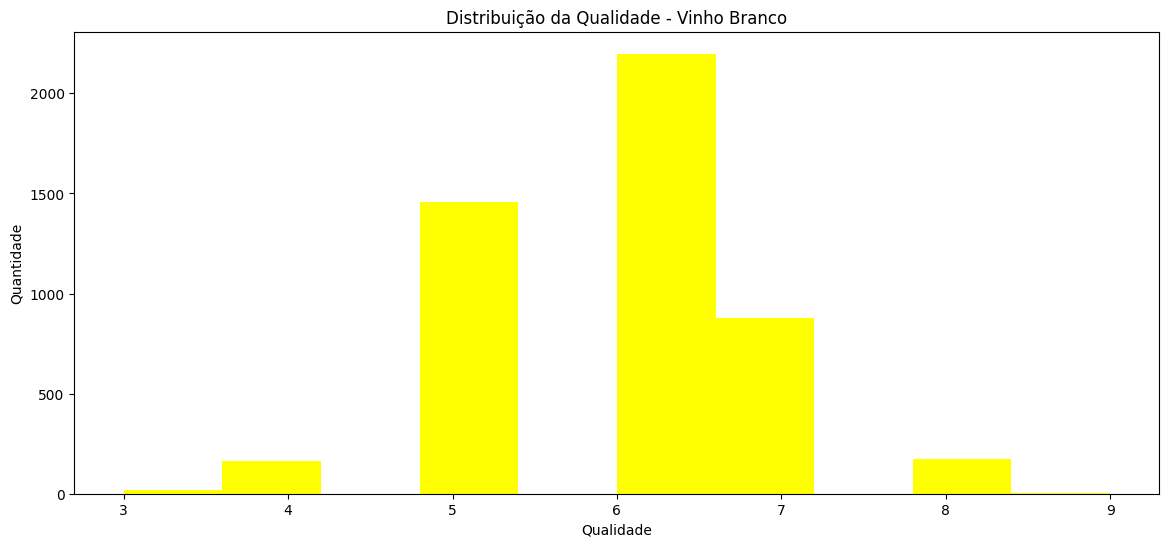

A categoria com mais unidades é a qualidade 6, com 2198 unidades
A participação de cada uma das categorias em porcentagem, no lote é :quality
6    44.875459
5    29.746835
7    17.966517
8     3.572887
4     3.327889
3     0.408330
9     0.102082
Name: proportion, dtype: float64


In [174]:
# Histograma para vinho branco
plt.figure(figsize=(14, 6))
plt.hist(df_white['quality'], bins=10, color='yellow')
plt.title('Distribuição da Qualidade - Vinho Branco')
plt.xlabel('Qualidade')
plt.ylabel('Quantidade')

plt.show()

# Calcular a porcentagem de cada nível de qualidade
quality_counts = df_white['quality'].value_counts(normalize=True) * 100

# Identificar a qualidade com maior quantidade
max_quality = df_white['quality'].value_counts().idxmax()
max_count = df_white['quality'].value_counts().max()

print(f'A categoria com mais unidades é a qualidade {max_quality}, com {max_count} unidades')
print(f'A participação de cada uma das categorias em porcentagem, no lote é :{quality_counts}')

## Matriz de correlação para entender a influência das variáveis no produto

In [175]:
correlation_matrix = df_red.corr()
print(correlation_matrix['quality'].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


Essa análise mostra que o *ALCOHOL* é a variável com maior relação positiva com o vinho, ou seja, que maiores concentrações podem estar associadas com melhor qualidade.

Enquanto a *VOLATILE ACIDITY* tem pior relação, o que pode significar que quanto em maior quantidade, pior a qualidade.